In [15]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as ticker

import seaborn as sns
df=pd.read_csv('south_africa_training_set.csv')
pd.set_option('display.max_columns',85)

In [504]:
df.head()

,Unnamed: 0,target,hashed_user_id,regist_date,is_bind_card,lastorder_usecase,lastorder_platform,lastorder_orderdate,subtotal_amount_today_daily,subtotal_amount_recent_7days,subtotal_amount_recent_30days,subtotal_ordercount_today_daily,subtotal_ordercount_recent_7days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,unique_app_category_visits,year_month
0,0,active,-1000772633524872632,2022-12-30,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,15,1,2022-12-30,6,0,0,2,1,202212
1,1,inactive,-1000772633524872632,2022-12-30,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,11,2,2023-01-20,2,0,0,2,1,202301
2,2,inactive,-1006559301419582051,2022-08-15,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,4,1,2022-12-06,2,0,0,1,0,202212
3,3,inactive,-1006671521575354929,2023-01-03,0,-1,-1,NaN,0.0,0.0,0.0,0,0,0,35,1,2023-01-03,17,0,0,3,2,202301
4,4,inactive,-1008193142447905044,2021-10-16,1,-1,-1,NaN,0.0,0.0,0.0,0,0,0,158,3,2022-11-21,12,0,0,7,5,202211


In [505]:
df.groupby('target')['unique_app_visits'].value_counts(bins=8,normalize=True)*100



target    unique_app_visits
active    (-0.089, 11.0]       98.170577
          (11.0, 22.0]          1.667654
          (22.0, 33.0]          0.127701
          (33.0, 44.0]          0.024054
          (44.0, 55.0]          0.006504
          (55.0, 66.0]          0.002271
          (66.0, 77.0]          0.001032
          (77.0, 88.0]          0.000206
inactive  (-0.091, 11.25]      99.247083
          (11.25, 22.5]         0.691398
          (22.5, 33.75]         0.048355
          (33.75, 45.0]         0.008945
          (45.0, 56.25]         0.002447
          (56.25, 67.5]         0.001181
          (67.5, 78.75]         0.000422
          (78.75, 90.0]         0.000169
Name: proportion, dtype: float64

### Last Order UseCase

#### Stats

Looking at the below stats you can visibly see that the percentage of the last order of active users  on mobile is double as compared to the users who are inactive 

In [506]:
df.groupby('target')['lastorder_usecase'].value_counts(normalize=True)*100


target    lastorder_usecase
active    -1                   62.261463
          MOBILE               35.074871
          MINI-PROGRAM          1.107813
          PPU                   0.788095
          DSTV                  0.494701
          EASYPAY               0.241673
          CSB                   0.029422
          BOXOFFICE             0.001961
inactive  -1                   80.984638
          MOBILE               17.843616
          MINI-PROGRAM          0.578236
          PPU                   0.279244
          DSTV                  0.190635
          EASYPAY               0.103799
          CSB                   0.019325
          BOXOFFICE             0.000506
Name: proportion, dtype: float64

#### Graph

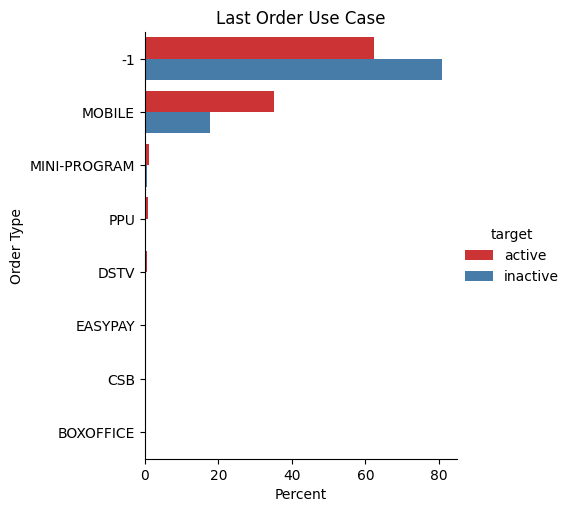

In [507]:

x,y = 'target', 'lastorder_usecase'
ax = sns.catplot,'data',
(df

.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((ax), x='percent',y=y,hue=x,kind='bar',palette='Set1')
.set(title='Last Order Use Case', xlabel='Percent', ylabel='Order Type'))


# Data Cleaning

In [16]:
#Change Date from Object to DateTime
df['max_date_time']=pd.to_datetime(df['max_date_time'])
df['regist_date']=pd.to_datetime(df['regist_date'])
df['lastorder_orderdate']=pd.to_datetime(df['lastorder_orderdate'])


In [17]:
#replace the -1s with NaN
df=df.replace(to_replace='-1',value=np.nan, regex=True)

In [510]:
df['max_date_time']

0         2022-12-30
1         2023-01-20
2         2022-12-06
3         2023-01-03
4         2022-11-21
             ...    
2153652   2022-10-31
2153653   2022-11-30
2153654   2022-12-31
2153655   2023-01-28
2153656   2022-12-18
Name: max_date_time, Length: 2153657, dtype: datetime64[ns]

In [511]:
df['regist_date']

0         2022-12-30
1         2022-12-30
2         2022-08-15
3         2023-01-03
4         2021-10-16
             ...    
2153652   2022-08-15
2153653   2022-08-15
2153654   2022-08-15
2153655   2022-08-15
2153656   2022-12-18
Name: regist_date, Length: 2153657, dtype: datetime64[ns]

In [18]:
#Dropping Columns that won't be used
df=df.drop(['Unnamed: 0'],axis=1)


# Feature Engineering

In [20]:
#create column regist month 
df['regist_month']=df['regist_date'].dt.to_period('M')

In [21]:
#create column month in df to see activity visuals where needed
df['lastorder_month']=df['lastorder_orderdate'].dt.to_period('M')

In [22]:
#Creating a column to look at the number of days on app
df['nr_days_on_app'] =(df['max_date_time'] - df['regist_date']).dt.days

In [23]:
#Creating a column of months active  on app
df['months_active'] = ((df['max_date_time'] - df['regist_date']) / np.timedelta64(1, 'M')).round()

In [24]:
df.query('year_month <202301')\
.groupby('target')['lastorder_month'].value_counts(normalize=True)*100


target    lastorder_month
active    2022-11            36.064569
          2022-12            34.489456
          2022-10            26.655743
          2022-09             2.790232
inactive  2022-12            44.747424
          2022-11            37.803468
          2022-10            14.385524
          2022-09             3.063584
Name: proportion, dtype: float64

In [573]:
(df
.groupby('target')['lastorder_orderdate']

.value_counts(normalize=True)*100


)

target    lastorder_orderdate
active    2022-11-30             8.947617
          2022-12-31             8.543307
          2022-10-31             6.853849
          2022-11-29             4.221730
          2022-12-30             4.055411
                                   ...   
inactive  2022-09-24             0.019083
          2022-09-25             0.017307
          2022-09-17             0.016420
          2022-09-18             0.015089
          2022-09-19             0.013313
Name: proportion, Length: 245, dtype: float64

In [518]:
#Check the number of columns with no values
nan_count = df.isna().sum()
print(nan_count )

Unnamed: 0                                 0
target                                     0
hashed_user_id                             0
regist_date                                0
is_bind_card                               0
lastorder_usecase                    1562768
lastorder_platform                   1562760
lastorder_orderdate                  1562760
subtotal_amount_today_daily                0
subtotal_amount_recent_7days               0
subtotal_amount_recent_30days              0
subtotal_ordercount_today_daily            0
subtotal_ordercount_recent_7days           0
subtotal_ordercount_recent_30days          0
nr_interactions                            0
nr_days_interacted                         0
max_date_time                              0
nr_unique_pages_visited                    0
search_events                              0
unique_search_terms                        0
unique_app_visits                          0
unique_app_category_visits                 0
year_month

In [575]:
df.head(10)

,target,hashed_user_id,regist_date,is_bind_card,lastorder_usecase,lastorder_platform,lastorder_orderdate,subtotal_amount_today_daily,subtotal_amount_recent_7days,subtotal_amount_recent_30days,subtotal_ordercount_today_daily,subtotal_ordercount_recent_7days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,unique_app_category_visits,year_month,regist_month,lastorder_month,nr_days_on_app,months_active
0,active,-1000772633524872632,2022-12-30,0,NaN,NaN,NaT,0.0,0.0,0.0,0,0,0,15,1,2022-12-30,6,0,0,2,1,202212,2022-12,NaT,0,0.0
1,inactive,-1000772633524872632,2022-12-30,0,NaN,NaN,NaT,0.0,0.0,0.0,0,0,0,11,2,2023-01-20,2,0,0,2,1,202301,2022-12,NaT,21,1.0
2,inactive,-1006559301419582051,2022-08-15,0,NaN,NaN,NaT,0.0,0.0,0.0,0,0,0,4,1,2022-12-06,2,0,0,1,0,202212,2022-08,NaT,113,4.0
3,inactive,-1006671521575354929,2023-01-03,0,NaN,NaN,NaT,0.0,0.0,0.0,0,0,0,35,1,2023-01-03,17,0,0,3,2,202301,2023-01,NaT,0,0.0
4,inactive,-1008193142447905044,2021-10-16,1,NaN,NaN,NaT,0.0,0.0,0.0,0,0,0,158,3,2022-11-21,12,0,0,7,5,202211,2021-10,NaT,401,13.0
5,inactive,-1008849587519297040,2022-12-18,0,NaN,NaN,NaT,0.0,0.0,0.0,0,0,0,11,1,2022-12-18,4,0,0,2,2,202212,2022-12,NaT,0,0.0
6,active,-1020500780636001202,2022-04-07,1,MOBILE,electrum,2022-10-19,0.0,0.0,41.0,0,0,2,393,17,2022-10-24,20,0,0,4,2,202210,2022-04,2022-10,200,6.0
7,active,-1020500780636001202,2022-04-07,1,MOBILE,electrum,2022-11-29,0.0,11.0,66.0,0,2,3,391,15,2022-11-30,20,0,0,5,3,202211,2022-04,2022-11,237,8.0
8,active,-1020500780636001202,2022-04-07,1,MOBILE,electrum,2022-12-18,0.0,0.0,12.0,0,0,1,241,12,2022-12-25,17,0,0,3,2,202212,2022-04,2022-12,262,8.0
9,inactive,-1020500780636001202,2022-04-07,1,MOBILE,electrum,2022-12-18,0.0,0.0,0.0,0,0,0,86,5,2023-01-28,11,0,0,2,1,202301,2022-04,2022-12,296,10.0


## Original Data Frame Visuals

### Last Order Graph

The graph below is a visualization of what customers have spent on the app in 30 days 

In [521]:
(df
 .groupby('target')['lastorder_platform'].count())



target
active      365561
inactive    225336
Name: lastorder_platform, dtype: int64

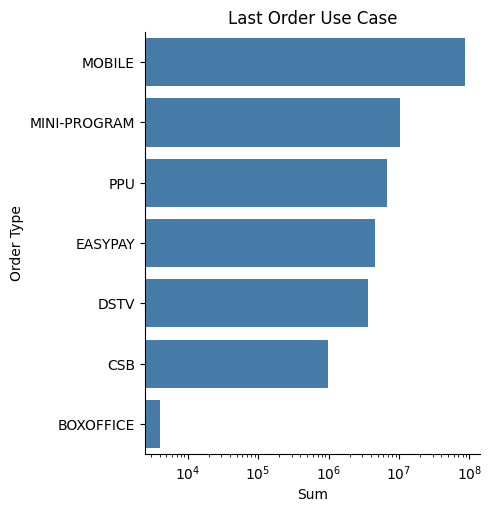

In [522]:
x,y = 'lastorder_usecase', 'subtotal_amount_recent_30days'
ax=sns.catplot,'data'
(df
.query('subtotal_amount_recent_30days>1')
.groupby(x)[y]
.sum()
 .sort_values(ascending=False)
.rename('sum')
.reset_index()
.pipe((ax), x='sum',y=x,kind='bar',log=True,color='#377eb8')
.set(title='Last Order Use Case', xlabel='Sum', ylabel='Order Type'))

### Last Order Date

The below graph is the number of orders on a specific day grouped by a users categorized as active or inactive,normalized and converted into percentage for better visualization.

An interesting trend you can see on the active is that between the 20th and the last day of the month,the activity is high due to the fact that users have have been paid



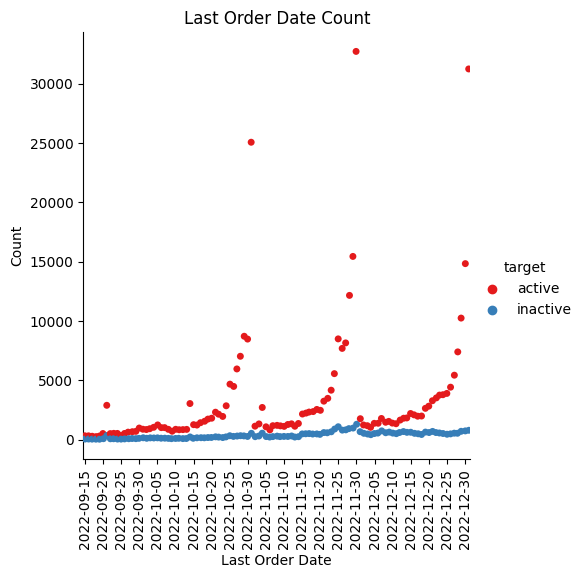

In [523]:

x,y = 'target', 'lastorder_orderdate',
ax = sns.catplot,'data',

(df

.query('year_month <202301')
.groupby(y)[x]
.value_counts()
#.value_counts(normalize=True)
#.mul(100)
.rename('Count')
.reset_index()

.pipe((ax), x=y,y='Count',hue=x,palette='Set1')

 .set_xticklabels( rotation=90)
 .set(title='Last Order Date Count', xlabel='Last Order Date')
.ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

)


The dates with the highest order counts is always around the 30th and 31st of every month

In [524]:
x,y = 'target', 'lastorder_orderdate',
ax = sns.catplot,'data',

df1_=(df

.query('year_month <202301')
.groupby(y)[x]
.value_counts()
        .sort_values(ascending=False)
#.value_counts(normalize=True)
#.mul(100)
.rename('Count')
.reset_index()
    
)
dfl_

,lastorder_orderdate,target,Count
0,2022-11-30,active,32709
1,2022-12-31,active,31231
2,2022-10-31,active,25055
3,2022-11-29,active,15433
4,2022-12-30,active,14825
...,...,...,...
209,2022-09-15,inactive,43
210,2022-09-25,inactive,39
211,2022-09-17,inactive,37
212,2022-09-18,inactive,34


## User Registrations Monthly

Below it is seen that there is a high number of registrations on the lauch of the app which was October 2021 and had the R1 promotion

Another spike October and November 2022 when there was campaign to win away a share of R1 million to 20 lucky winners between the 10 and 31 October 2022




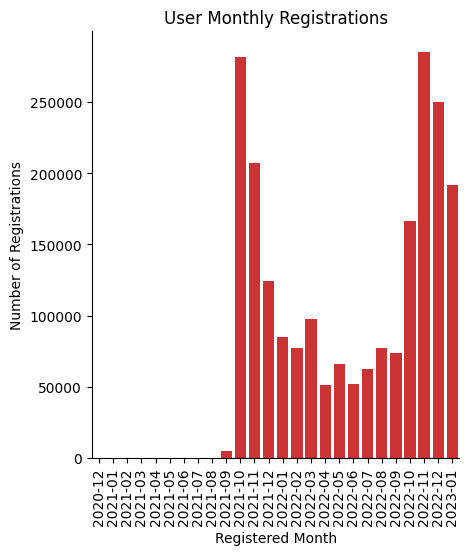

In [525]:

x,y = 'regist_month', 'hashed_user_id'
ax = sns.catplot,'data',
(df
.groupby(x)[y]
.count()
.rename('count')
.reset_index()

.pipe((ax), x=x,y='count',kind='bar',color='#e41a1c')
.set(title='User Monthly Registrations', xlabel='Registered Month', ylabel='Number of Registrations')

.set_xticklabels( rotation=90))


## User Spend Behavour

From the below it is clear that there is a slight correlation to registrations on app and the spenditure on the app,especially on the launch month.

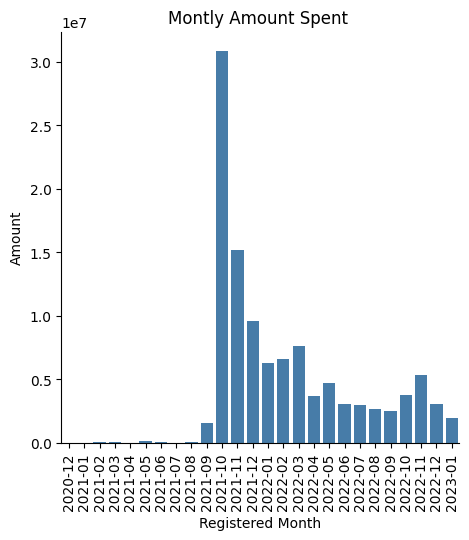

In [526]:
x,y='regist_month','subtotal_amount_recent_30days'
ax=sns.catplot,'data'
(df
.groupby(x)[y]
.sum()
.rename('sum')
.reset_index()
.pipe((ax), x=x,y='sum',kind='bar',color='#377eb8')
.set(title='Montly Amount Spent ', xlabel='Registered Month', ylabel='Amount')

.set_xticklabels( rotation=90))


In [576]:
df.head()

,target,hashed_user_id,regist_date,is_bind_card,lastorder_usecase,lastorder_platform,lastorder_orderdate,subtotal_amount_today_daily,subtotal_amount_recent_7days,subtotal_amount_recent_30days,subtotal_ordercount_today_daily,subtotal_ordercount_recent_7days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,unique_app_category_visits,year_month,regist_month,lastorder_month,nr_days_on_app,months_active
0,active,-1000772633524872632,2022-12-30,0,NaN,NaN,NaT,0.0,0.0,0.0,0,0,0,15,1,2022-12-30,6,0,0,2,1,202212,2022-12,NaT,0,0.0
1,inactive,-1000772633524872632,2022-12-30,0,NaN,NaN,NaT,0.0,0.0,0.0,0,0,0,11,2,2023-01-20,2,0,0,2,1,202301,2022-12,NaT,21,1.0
2,inactive,-1006559301419582051,2022-08-15,0,NaN,NaN,NaT,0.0,0.0,0.0,0,0,0,4,1,2022-12-06,2,0,0,1,0,202212,2022-08,NaT,113,4.0
3,inactive,-1006671521575354929,2023-01-03,0,NaN,NaN,NaT,0.0,0.0,0.0,0,0,0,35,1,2023-01-03,17,0,0,3,2,202301,2023-01,NaT,0,0.0
4,inactive,-1008193142447905044,2021-10-16,1,NaN,NaN,NaT,0.0,0.0,0.0,0,0,0,158,3,2022-11-21,12,0,0,7,5,202211,2021-10,NaT,401,13.0


### Creating DataFrame A

This dataframe is created to drop unnecessary columns in our point of view and rearrange our columns

In [4]:
#Dropping columns we won't need and naming the df
df_a=df.drop(columns=['unique_app_category_visits','unique_search_terms','search_events',
                      'subtotal_ordercount_recent_7days','subtotal_amount_recent_7days',
                      'subtotal_amount_today_daily', 'subtotal_ordercount_today_daily','is_bind_card',
                      'lastorder_platform'],axis=1)
df_a.head()

,Unnamed: 0,target,hashed_user_id,regist_date,lastorder_usecase,lastorder_orderdate,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,max_date_time,nr_unique_pages_visited,unique_app_visits,year_month
0,0,active,-1000772633524872632,2022-12-30,-1,NaN,0.0,0,15,1,2022-12-30,6,2,202212
1,1,inactive,-1000772633524872632,2022-12-30,-1,NaN,0.0,0,11,2,2023-01-20,2,2,202301
2,2,inactive,-1006559301419582051,2022-08-15,-1,NaN,0.0,0,4,1,2022-12-06,2,1,202212
3,3,inactive,-1006671521575354929,2023-01-03,-1,NaN,0.0,0,35,1,2023-01-03,17,3,202301
4,4,inactive,-1008193142447905044,2021-10-16,-1,NaN,0.0,0,158,3,2022-11-21,12,7,202211


In [5]:
#Re-arranging columns in df
df_a = df.reindex(columns=['target','is_bind_card','hashed_user_id','regist_date','months_active','year_month',
                           'unique_app_visits','nr_days_on_app','nr_interactions',
                           'subtotal_amount_recent_30days','subtotal_ordercount_recent_30days',
                           'nr_days_interacted','max_date_time','nr_unique_pages_visited','lastorder_orderdate','lastorder_usecase'])



In [8]:
#Creating a column to look at the number of days on app
df_a['nr_days_on_app'] =(df['max_date_time'] - df['regist_date']).dt.days

In [531]:
df_a.head()

,target,is_bind_card,hashed_user_id,regist_date,months_active,year_month,unique_app_visits,nr_days_on_app,nr_interactions,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_days_interacted,max_date_time,nr_unique_pages_visited,lastorder_orderdate,lastorder_usecase
0,active,0,-1000772633524872632,2022-12-30,0.0,202212,2,0,15,0.0,0,1,2022-12-30,6,NaT,NaN
1,inactive,0,-1000772633524872632,2022-12-30,1.0,202301,2,21,11,0.0,0,2,2023-01-20,2,NaT,NaN
2,inactive,0,-1006559301419582051,2022-08-15,4.0,202212,1,113,4,0.0,0,1,2022-12-06,2,NaT,NaN
3,inactive,0,-1006671521575354929,2023-01-03,0.0,202301,3,0,35,0.0,0,1,2023-01-03,17,NaT,NaN
4,inactive,1,-1008193142447905044,2021-10-16,13.0,202211,7,401,158,0.0,0,3,2022-11-21,12,NaT,NaN


### Creating DataFrame B

The dataframe is created to drop data from 202301 as all users in this month are inactive

In [9]:

df_b=df_a.query('year_month <202301')
df_b.sort_values('subtotal_amount_recent_30days',ascending=False)\
.round(2)\
.head()

,target,is_bind_card,hashed_user_id,regist_date,months_active,year_month,unique_app_visits,nr_days_on_app,nr_interactions,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_days_interacted,max_date_time,nr_unique_pages_visited,lastorder_orderdate,lastorder_usecase
1976646,active,1,-8999309118655251227,2021-10-12,NaN,202212,9,444,381,109800.23,11,14,2022-12-30,52,2022-12-29,DSTV
1976645,active,1,-8999309118655251227,2021-10-12,NaN,202211,5,414,342,96589.83,9,15,2022-11-30,33,2022-11-28,DSTV
1976644,active,1,-8999309118655251227,2021-10-12,NaN,202210,4,384,200,95339.00,6,10,2022-10-31,24,2022-10-30,DSTV
880697,active,1,3141285788806466311,2022-10-07,NaN,202211,2,52,117,52062.02,4,8,2022-11-28,18,2022-11-28,CSB
1470067,active,1,-8434341560974171616,2021-09-22,NaN,202211,7,432,216,44085.00,4,8,2022-11-28,30,2022-11-28,PPU


In [533]:
df_b['max_date_time']


0         2022-12-30
2         2022-12-06
4         2022-11-21
5         2022-12-18
6         2022-10-24
             ...    
2153650   2022-12-31
2153652   2022-10-31
2153653   2022-11-30
2153654   2022-12-31
2153656   2022-12-18
Name: max_date_time, Length: 1490793, dtype: datetime64[ns]

### Using Card

The number of users that spending and interacting more on the app are the ones who have binded thier card on the app, binding your card is directly proportional to the number of interactions.

Find a way to encourage users to bind thier card on the app, as we believe this will encourage interaction and increase the number of active users


<Axes: title={'center': 'Binded Card'}, xlabel='Bind Card', ylabel='Percentage'>

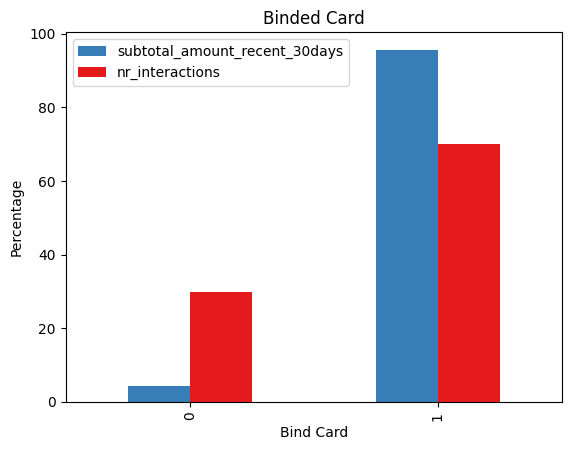

In [534]:

(df_b
 .groupby(['is_bind_card'])[['subtotal_amount_recent_30days','nr_interactions']]
.sum()
.apply(lambda x: 100*x/x.sum())  
.plot(kind='bar', ylabel='Percentage',xlabel='Bind Card',title='Binded Card',color = ['#377eb8', '#e41a1c'])
)



### Query  Active and Inactive 

In [535]:
df_active=df_b.query("target == 'active'")
df_active.sort_values('nr_days_on_app')\
.head(10)

,target,is_bind_card,hashed_user_id,regist_date,months_active,year_month,unique_app_visits,nr_days_on_app,nr_interactions,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_days_interacted,max_date_time,nr_unique_pages_visited,lastorder_orderdate,lastorder_usecase
0,active,0,-1000772633524872632,2022-12-30,0.0,202212,2,0,15,0.0,0,1,2022-12-30,6,NaT,NaN
1574125,active,0,-2411975757039312848,2022-11-30,0.0,202211,1,0,5,0.0,0,1,2022-11-30,3,NaT,NaN
1574148,active,0,-2461071460167818998,2022-10-20,0.0,202210,7,0,48,0.0,0,1,2022-10-20,3,NaT,NaN
1574160,active,0,-2482971335238486048,2022-12-09,0.0,202212,5,0,23,0.0,0,1,2022-12-09,5,NaT,NaN
354935,active,0,7684002927941374636,2022-10-03,0.0,202210,2,0,17,0.0,0,1,2022-10-03,6,NaT,NaN
354913,active,1,7648048902289367036,2022-11-22,0.0,202211,6,0,38,59.0,1,1,2022-11-22,12,2022-11-22,MOBILE
354891,active,0,7624776335956283495,2022-11-03,0.0,202211,2,0,64,0.0,0,1,2022-11-03,10,NaT,NaN
354885,active,0,7619517747276587545,2022-11-19,0.0,202211,3,0,36,0.0,0,1,2022-11-19,13,NaT,NaN
1574217,active,0,-2568450497905460894,2022-12-31,0.0,202212,7,0,20,0.0,0,1,2022-12-31,3,NaT,NaN
354864,active,0,7599741611601255070,2022-12-01,0.0,202212,2,0,79,0.0,0,1,2022-12-01,14,NaT,NaN


In [536]:
df_inactive=df_b.query("target == 'inactive'")
df_inactive.head()

,target,is_bind_card,hashed_user_id,regist_date,months_active,year_month,unique_app_visits,nr_days_on_app,nr_interactions,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_days_interacted,max_date_time,nr_unique_pages_visited,lastorder_orderdate,lastorder_usecase
2,inactive,0,-1006559301419582051,2022-08-15,4.0,202212,1,113,4,0.0,0,1,2022-12-06,2,NaT,NaN
4,inactive,1,-1008193142447905044,2021-10-16,13.0,202211,7,401,158,0.0,0,3,2022-11-21,12,NaT,NaN
5,inactive,0,-1008849587519297040,2022-12-18,0.0,202212,2,0,11,0.0,0,1,2022-12-18,4,NaT,NaN
11,inactive,1,-1025425308758786705,2021-11-21,12.0,202212,1,376,15,0.0,0,1,2022-12-02,8,2022-11-15,MOBILE
12,inactive,0,-1030341130419364162,2022-11-08,0.0,202211,2,0,18,0.0,0,1,2022-11-08,5,NaT,NaN


# Data Preparation

What was noticed from our dataset is that the month of Jan 2023 there are no active users,only inactive users and we came to the conclusion to remove the data from our analysis.
 
Looking at the graphs below it is clear that this information can scew our predictions and data analysis


[Text(0.5, 1.0, 'Unique Pages Visited Per Month '),
 Text(0.5, 0, 'Month of Year'),
 Text(0, 0.5, 'Unique Pages Visited')]

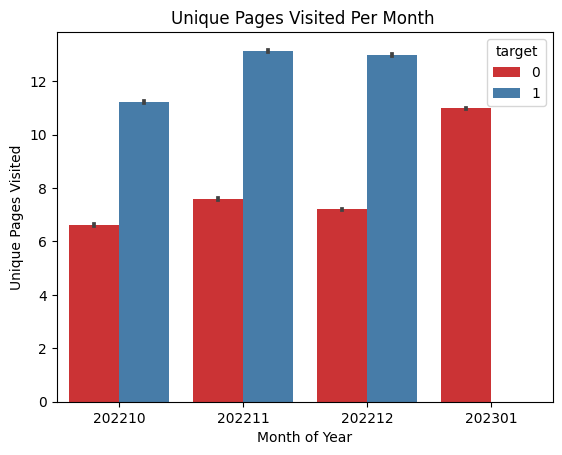

In [54]:
(
sns.barplot(data=df,x='year_month',y='nr_unique_pages_visited',hue='target',palette='Set1')
.set(title='Unique Pages Visited Per Month ', xlabel='Month of Year', ylabel='Unique Pages Visited'))

### Histogram Plots by Number of Interactions

#### Incorrect Data

The histogram below is an indication that the inactive number of interactions are caused by the Jan 2023 data all being tagged as inactive users.
This data is showing both graphs (active and inactive) having alsmost the same number of interactions which will cause issues with our modeling 

[(0.0, 10000.0)]

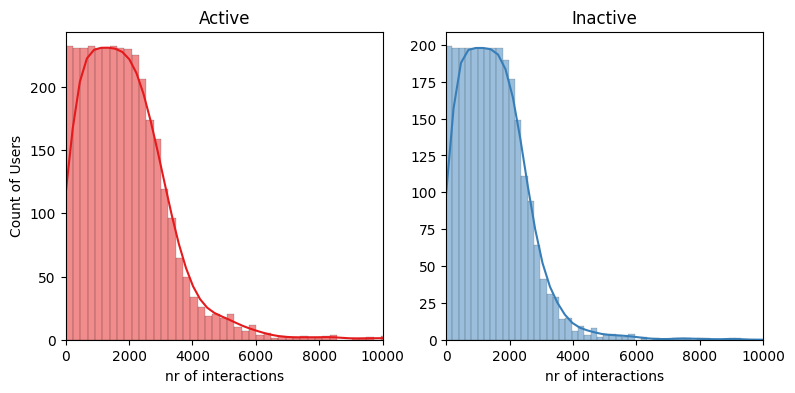

In [538]:
act=(df.query("target == 'active'")
.groupby('target')['nr_interactions'].value_counts()
.sort_values(ascending=False)
.rename('count')
    .reset_index())
in_act=(df.query("target == 'inactive'")
.groupby('target')['nr_interactions'].value_counts()
.sort_values(ascending=False)
.rename('count')
    .reset_index())

fig, axs = plt.subplots(1, 2, figsize=(9, 4))

g=sns.histplot(data=act, x='nr_interactions', kde=True,color='#e41a1c', ax=axs[0])
k=sns.histplot(data=in_act, x='nr_interactions', kde=True, color='#377eb8', ax=axs[1])
g.set(title='Active', xlabel='nr of interactions', ylabel='Count of Users')
k.set(title='Inactive', xlabel='nr of interactions',ylabel=None)
g.set(xlim=(0, 10000))
k.set(xlim=(0, 10000))


#### Correct Data

The below graphs are plotted with the January 2023 data removed and we can now see the difference in number of interactions between the active and inactive users.
The active users number of interaction is double the interaction of the inactive users,this will be a good column in the dataframe to use for our models

[(0.0, 6000.0)]

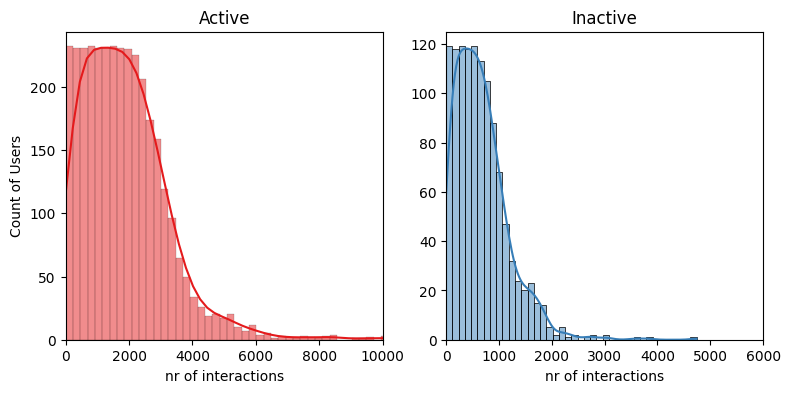

In [64]:
act_b=(df_b.query("target == 'active'")
.groupby('target')['nr_interactions'].value_counts()
.sort_values(ascending=False)
.rename('count')
    .reset_index())
in_act_b=(df_b.query("target == 'inactive'")
.groupby('target')['nr_interactions'].value_counts()
.sort_values(ascending=False)
.rename('count')
    .reset_index())

fig, axs = plt.subplots(1, 2, figsize=(9, 4))

g=sns.histplot(data=act_b, x='nr_interactions', kde=True, color='#e41a1c', ax=axs[0])
k=sns.histplot(data=in_act_b, x='nr_interactions',kde=True, color='#377eb8', ax=axs[1])
g.set(title='Active', xlabel='nr of interactions', ylabel='Count of Users')
k.set(title='Inactive', xlabel='nr of interactions',ylabel=None)
g.set(xlim=(0, 10000))
k.set(xlim=(0, 6000))

### Active and Inactive Correlation

The graph below is a comparison of the active and inactive number of interactions and its clear that the active user interaction is three times the interactions of the inactive users

In [62]:
act=(df_b.query("target == 'active'")
.groupby('target')['nr_interactions'].value_counts()
.sort_values(ascending=False)
.rename('count')
    .reset_index())
in_act=(df_b.query("target == 'inactive'")
.groupby('target')['nr_interactions'].value_counts()
.sort_values(ascending=False)
.rename('count')
    .reset_index())


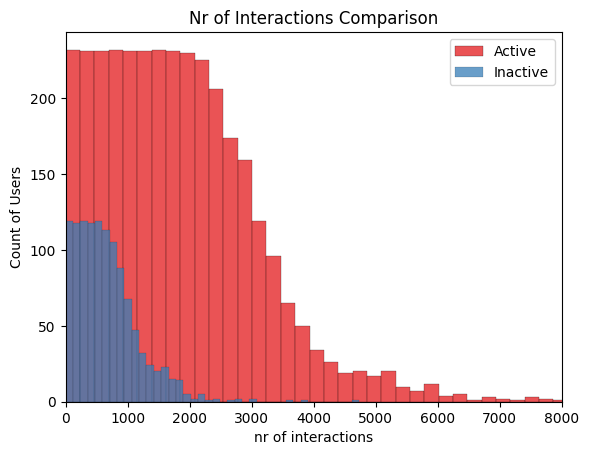

In [66]:

g=sns.histplot(data=act_b, x='nr_interactions' ,color='#e41a1c', label="Active")
g=sns.histplot(data=in_act_b, x='nr_interactions',color='#377eb8', label="Inactive")
g.set(xlim=(0, 8000))
g.set(title='Nr of Interactions Comparison', xlabel='nr of interactions', ylabel='Count of Users')
plt.legend() 
plt.show()

### Subtotal Amount 30 Days

The below is and indication of how much or the difference in spent on app between the active and inactive users.Both the count of users and amount are high in correlation to the inactive users

In [68]:
act_a=(df_b.query("target == 'active'")
.groupby('target')['subtotal_amount_recent_30days'].value_counts()
.sort_values(ascending=False)
.rename('count')
    .reset_index())
in_act_a=(df_b.query("target == 'inactive'")
.groupby('target')['subtotal_amount_recent_30days'].value_counts()
.sort_values(ascending=False)
.rename('count')
    .reset_index())



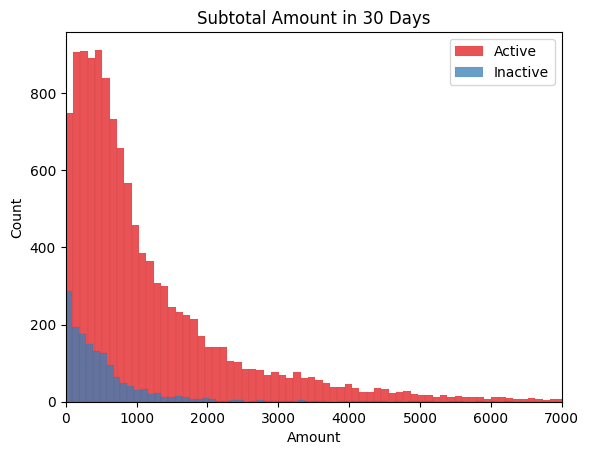

In [71]:
g=sns.histplot(data=act_a, x='subtotal_amount_recent_30days' ,color='#e41a1c', label="Active")
g=sns.histplot(data=in_act_a, x='subtotal_amount_recent_30days',color='#377eb8', label="Inactive")
g.set(xlim=(0, 7000))
g.set(title='Subtotal Amount in 30 Days', xlabel='Amount', ylabel='Count')
plt.legend() 
plt.show()

In [52]:
sun = np.where(df_b['subtotal_amount_recent_30days'] >3000)
sun

(array([   1733,    1734,    4927, ..., 1484982, 1485401, 1487233],
       dtype=int64),)

# Model Building

In [30]:
df['target'] = df['target'].map({'active': 1, 'inactive': 0})  

In [33]:
df_m = df.drop(columns=['regist_date','lastorder_usecase','regist_month','lastorder_month','lastorder_orderdate','lastorder_platform','max_date_time'])

In [34]:
df_m.head()

,target,hashed_user_id,is_bind_card,subtotal_amount_today_daily,subtotal_amount_recent_7days,subtotal_amount_recent_30days,subtotal_ordercount_today_daily,subtotal_ordercount_recent_7days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,unique_app_category_visits,year_month,nr_days_on_app,months_active
0,1,-1000772633524872632,0,0.0,0.0,0.0,0,0,0,15,1,6,0,0,2,1,202212,0,0.0
1,0,-1000772633524872632,0,0.0,0.0,0.0,0,0,0,11,2,2,0,0,2,1,202301,21,1.0
2,0,-1006559301419582051,0,0.0,0.0,0.0,0,0,0,4,1,2,0,0,1,0,202212,113,4.0
3,0,-1006671521575354929,0,0.0,0.0,0.0,0,0,0,35,1,17,0,0,3,2,202301,0,0.0
4,0,-1008193142447905044,1,0.0,0.0,0.0,0,0,0,158,3,12,0,0,7,5,202211,401,13.0


In [48]:
#df_m is the original dataframe with dates dropped and target converted into 0/1
df_n=(df_m
    .query('year_month <202301'))

In [49]:
df_n.query('target==1').describe().round(3) 

,target,hashed_user_id,is_bind_card,subtotal_amount_today_daily,subtotal_amount_recent_7days,subtotal_amount_recent_30days,subtotal_ordercount_today_daily,subtotal_ordercount_recent_7days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,unique_app_category_visits,year_month,nr_days_on_app,months_active
count,968666.0,9.686660e+05,968666.000,968666.000,968666.000,968666.000,968666.000,968666.000,968666.000,968666.000,968666.000,968666.000,968666.000,968666.000,968666.000,968666.000,968666.000,968666.000,968666.000
mean,1.0,-5.564223e+15,0.463,3.843,25.114,78.066,0.122,0.719,2.310,183.602,6.775,12.527,0.033,0.020,3.209,1.741,202211.073,217.177,6.983
std,0.0,5.325013e+18,0.499,50.047,167.375,367.123,0.452,1.958,5.854,313.586,7.198,10.671,0.458,0.224,2.922,1.758,0.801,157.953,5.102
min,1.0,-9.223298e+18,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,202210.000,0.000,0.000
25%,1.0,-4.609042e+18,0.000,0.000,0.000,0.000,0.000,0.000,0.000,23.000,2.000,5.000,0.000,0.000,1.000,0.000,202210.000,40.000,1.000
50%,1.0,-2.297007e+16,0.000,0.000,0.000,0.000,0.000,0.000,0.000,72.000,4.000,10.000,0.000,0.000,2.000,1.000,202211.000,247.000,8.000
75%,1.0,4.608600e+18,1.000,0.000,0.000,29.000,0.000,0.000,2.000,214.000,9.000,17.000,0.000,0.000,4.000,3.000,202212.000,369.000,12.000
max,1.0,9.223319e+18,1.000,8989.000,54105.360,109800.230,19.000,70.000,272.000,44410.000,31.000,167.000,97.000,46.000,88.000,30.000,202212.000,726.000,23.000


In [53]:
df_m.query('target==0').describe().round(3) 

,target,hashed_user_id,is_bind_card,subtotal_amount_today_daily,subtotal_amount_recent_7days,subtotal_amount_recent_30days,subtotal_ordercount_today_daily,subtotal_ordercount_recent_7days,subtotal_ordercount_recent_30days,nr_interactions,nr_days_interacted,nr_unique_pages_visited,search_events,unique_search_terms,unique_app_visits,unique_app_category_visits,year_month,nr_days_on_app,months_active
count,1184991.0,1.184991e+06,1184991.000,1184991.000,1184991.000,1184991.000,1184991.000,1184991.000,1184991.000,1184991.000,1184991.000,1184991.000,1184991.000,1184991.000,1184991.000,1184991.000,1184991.000,1184991.000,1184991.000
mean,0.0,-5.794586e+14,0.239,1.745,9.955,30.582,0.051,0.325,1.097,89.007,4.068,9.320,0.063,0.039,2.496,1.334,202261.457,156.501,5.030
std,0.0,5.326015e+18,0.427,36.827,105.639,234.207,0.302,1.451,4.538,201.981,5.982,8.946,0.635,0.288,2.273,1.476,44.558,172.157,5.566
min,0.0,-9.223298e+18,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,202210.000,0.000,0.000
25%,0.0,-4.607956e+18,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10.000,1.000,3.000,0.000,0.000,1.000,0.000,202212.000,2.000,0.000
50%,0.0,-4.017168e+15,0.000,0.000,0.000,0.000,0.000,0.000,0.000,26.000,2.000,6.000,0.000,0.000,2.000,1.000,202301.000,63.000,2.000
75%,0.0,4.612859e+18,0.000,0.000,0.000,0.000,0.000,0.000,0.000,77.000,4.000,12.000,0.000,0.000,3.000,2.000,202301.000,331.000,11.000
max,0.0,9.223346e+18,1.000,18171.510,54576.000,103568.680,19.000,88.000,247.000,46541.000,31.000,194.000,168.000,62.000,90.000,25.000,202301.000,767.000,25.000


In [597]:
df_m.corr()['target'].sort_values(ascending=False)

target                               1.000000
is_bind_card                         0.235143
nr_days_interacted                   0.201119
nr_interactions                      0.179290
nr_days_on_app                       0.178985
months_active                        0.178238
nr_unique_pages_visited              0.161312
unique_app_visits                    0.135883
unique_app_category_visits           0.124797
subtotal_ordercount_recent_30days    0.115972
subtotal_ordercount_recent_7days     0.114516
subtotal_ordercount_today_daily      0.093048
subtotal_amount_recent_30days        0.078153
subtotal_amount_recent_7days         0.055004
subtotal_amount_today_daily          0.024117
hashed_user_id                      -0.000466
search_events                       -0.025917
unique_search_terms                 -0.034591
year_month                          -0.604196
Name: target, dtype: float64

In [594]:
df_n.corr()['target'].sort_values(ascending=False)

target                               1.000000
nr_days_interacted                   0.371407
is_bind_card                         0.322269
nr_days_on_app                       0.296306
months_active                        0.295275
nr_interactions                      0.261057
nr_unique_pages_visited              0.259187
unique_app_category_visits           0.231090
unique_app_visits                    0.225698
subtotal_ordercount_recent_30days    0.211414
subtotal_ordercount_recent_7days     0.202295
subtotal_ordercount_today_daily      0.151058
subtotal_amount_recent_30days        0.112878
subtotal_amount_recent_7days         0.081525
subtotal_amount_today_daily          0.041401
search_events                        0.005422
unique_search_terms                  0.004680
hashed_user_id                      -0.001330
year_month                          -0.109153
Name: target, dtype: float64

In [587]:
df_m.groupby(['target'])\
.agg({'unique_app_visits':['mean'],'months_active':['mean'],'nr_days_on_app':['mean'],'nr_interactions':['mean'],'subtotal_amount_recent_30days':['mean']})

,unique_app_visits,months_active,nr_days_on_app,nr_interactions,subtotal_amount_recent_30days
,mean,mean,mean,mean,mean
target,,,,,
0,2.495851,5.030442,156.501482,89.007116,30.581684
1,3.208628,6.982877,217.177103,183.602337,78.066437


In [549]:
df_b.groupby(['target'])\
.agg({'unique_app_visits':['mean'],'months_active':['mean'],'nr_days_on_app':['mean'],'nr_interactions':['mean'],'subtotal_amount_recent_30days':['mean']})

,unique_app_visits,months_active,nr_days_on_app,nr_interactions,subtotal_amount_recent_30days
,mean,mean,mean,mean,mean
target,,,,,
active,3.208628,6.982877,217.177103,183.602337,78.066437
inactive,1.964346,3.739705,116.475486,38.383840,6.175223


In [550]:
df_b.head()

,target,is_bind_card,hashed_user_id,regist_date,months_active,year_month,unique_app_visits,nr_days_on_app,nr_interactions,subtotal_amount_recent_30days,subtotal_ordercount_recent_30days,nr_days_interacted,max_date_time,nr_unique_pages_visited,lastorder_orderdate,lastorder_usecase
0,active,0,-1000772633524872632,2022-12-30,0.0,202212,2,0,15,0.0,0,1,2022-12-30,6,NaT,NaN
2,inactive,0,-1006559301419582051,2022-08-15,4.0,202212,1,113,4,0.0,0,1,2022-12-06,2,NaT,NaN
4,inactive,1,-1008193142447905044,2021-10-16,13.0,202211,7,401,158,0.0,0,3,2022-11-21,12,NaT,NaN
5,inactive,0,-1008849587519297040,2022-12-18,0.0,202212,2,0,11,0.0,0,1,2022-12-18,4,NaT,NaN
6,active,1,-1020500780636001202,2022-04-07,6.0,202210,4,200,393,41.0,2,17,2022-10-24,20,2022-10-19,MOBILE


In [551]:
df_b.columns

Index(['target', 'is_bind_card', 'hashed_user_id', 'regist_date',
       'months_active', 'year_month', 'unique_app_visits', 'nr_days_on_app',
       'nr_interactions', 'subtotal_amount_recent_30days',
       'subtotal_ordercount_recent_30days', 'nr_days_interacted',
       'max_date_time', 'nr_unique_pages_visited', 'lastorder_orderdate',
       'lastorder_usecase'],
      dtype='object')

In [552]:
df_c=df_b.drop(columns=[ 'hashed_user_id', 'subtotal_ordercount_recent_30days','regist_date',
                        'year_month','max_date_time','nr_unique_pages_visited', 'unique_app_visits', 'nr_days_on_app'],axis=1)


df_c.head()

,target,is_bind_card,months_active,nr_interactions,subtotal_amount_recent_30days,nr_days_interacted,lastorder_orderdate,lastorder_usecase
0,active,0,0.0,15,0.0,1,NaT,NaN
2,inactive,0,4.0,4,0.0,1,NaT,NaN
4,inactive,1,13.0,158,0.0,3,NaT,NaN
5,inactive,0,0.0,11,0.0,1,NaT,NaN
6,active,1,6.0,393,41.0,17,2022-10-19,MOBILE


In [553]:
df_c['target'] = df_c['target'].map({'active': 1, 'inactive': 0})  

In [554]:
df_c.head()

,target,is_bind_card,months_active,nr_interactions,subtotal_amount_recent_30days,nr_days_interacted,lastorder_orderdate,lastorder_usecase
0,1,0,0.0,15,0.0,1,NaT,NaN
2,0,0,4.0,4,0.0,1,NaT,NaN
4,0,1,13.0,158,0.0,3,NaT,NaN
5,0,0,0.0,11,0.0,1,NaT,NaN
6,1,1,6.0,393,41.0,17,2022-10-19,MOBILE


In [555]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X=df_c.drop(columns=['target'])
y=df_c['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
score=accuracy_score(y_test,predictions)
score

TypeError: float() argument must be a string or a number, not 'NaTType'

In [ ]:
### Classification report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

rfc_predict_test = (model.predict_proba(X_test[X.columns])[:,1] >= 0.288).astype(bool)
rfc_cv_score = cross_val_score(model, X_test[X.columns], y_test, cv=5, scoring='roc_auc')

print("=== Confusion Matrix : Test ===")
print(confusion_matrix(y_test, rfc_predict_test))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict_test))
print('\n')

In [ ]:
plt.figure(figsize=(24, 10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(X_test.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Conclusion

#### We can assume that the machine learning build was a success looking at the output of 90 percent